# MNIST Handwritten Digit Classification with Neural Network | Deep *Learning*

Surendra Prajapat

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from kera.datasets

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
type(x_train)

numpy.ndarray

In [51]:
# shape of the numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images(28 x 28)

Test data = 10,000 Images(28 x 28)

In [52]:
# printing the 11th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

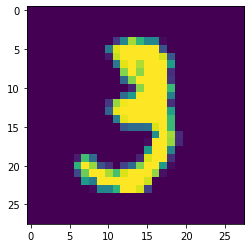

3


In [53]:
# displaying the Image
plt.imshow(x_train[10])
plt.show()

# print the corresponding label
print(y_train[10])


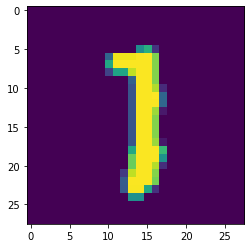

1


In [54]:
# displaying the Image
plt.imshow(x_train[3456])
plt.show()

# print the corresponding label
print(y_train[3456])


Image Lables

In [55]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [56]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset. If not, we have to resize all the images to a comman dimension 

In [57]:
# scalling the values

x_train = x_train/255
x_test = x_test/255

In [58]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Buiding the Neural Network


In [59]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [60]:
# compiling the Neural Network 
# sparse_categorical_crossentropy: when we use simple categorical valaue(1,2,3 etc.)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [61]:
# training the Neural Network 
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.9128
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1372 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1021 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0811 - accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0420 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

Training data accuracy = 98.9%

Accuracy on Test data:

In [62]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9715
0.9714999794960022


Test data accuracy = 97.45%

In [63]:
print(x_test.shape)

(10000, 28, 28)


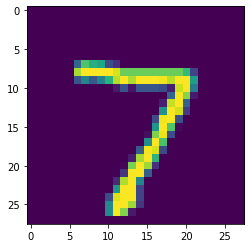

In [64]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [65]:
print(y_test[0])

7


In [66]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [67]:
print(y_pred.shape)

(10000, 10)


In [68]:
print(y_pred[0])

[4.4697344e-06 6.7602509e-01 9.3204159e-01 4.6666029e-01 8.8299350e-07
 1.6259986e-03 1.2061250e-06 9.9999988e-01 9.7915565e-04 1.4452353e-01]


model.predict() gives the prediction probability of each class for that data point

In [69]:
# converting the prediction probabilities to class label

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [70]:
# converting the prediction probabilities to class label for all test data point
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [71]:
print(y_pred)

[[4.4697344e-06 6.7602509e-01 9.3204159e-01 ... 9.9999988e-01
  9.7915565e-04 1.4452353e-01]
 [8.6669251e-04 9.6483368e-01 9.9999893e-01 ... 1.4188341e-03
  1.4740238e-01 1.1874692e-05]
 [4.2033778e-03 9.9995881e-01 9.2037886e-02 ... 4.4414306e-01
  6.6266125e-01 7.7049240e-02]
 ...
 [3.1451964e-05 4.6779254e-01 2.5878494e-04 ... 9.3424886e-01
  1.2328279e-01 9.9905664e-01]
 [6.8080112e-02 5.0341328e-07 1.8806352e-04 ... 2.0040113e-02
  9.9512583e-01 1.1833801e-02]
 [8.3548909e-01 6.6508246e-06 1.6938980e-05 ... 7.3253283e-09
  8.6822631e-03 3.0803905e-05]]


y_test = True labels

y_pred_labels = Predicted Labels

Confusion Matrix

In [72]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [73]:
print(conf_mat)

tf.Tensor(
[[ 967    1    0    2    2    3    1    2    1    1]
 [   0 1123    3    1    0    0    1    1    6    0]
 [   3    4  997    9    3    0    2    4    9    1]
 [   0    1    2  970    0   26    0    6    2    3]
 [   0    0    1    0  970    1    2    1    0    7]
 [   1    1    0    5    0  877    3    2    2    1]
 [   3    3    2    2    7   16  924    0    1    0]
 [   1    6    8    3    1    1    0 1002    3    3]
 [   5    1    3    8    8   21    2    5  919    2]
 [   1    3    1    1   15   13    0    9    0  966]], shape=(10, 10), dtype=int32)


Text(0.5, 51.0, 'Predicted Labels')

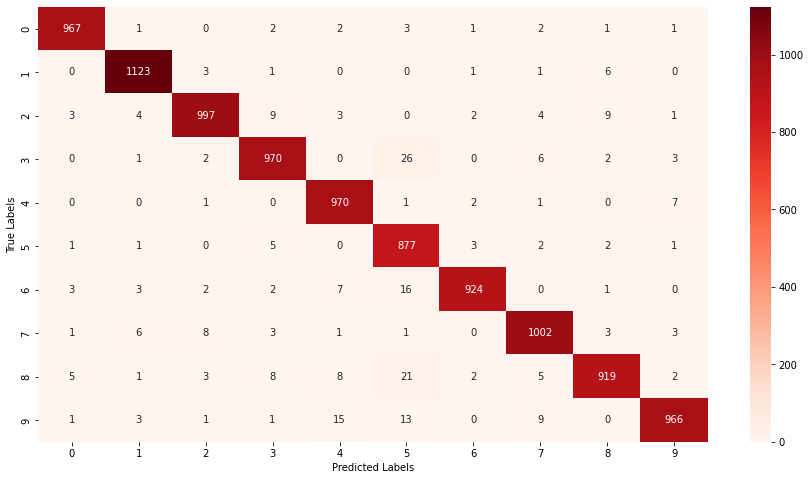

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive System

In [75]:
input_image_path = "/content/predict.png"

input_image = cv2.imread(input_image_path)

In [76]:
type(input_image)

numpy.ndarray

In [77]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


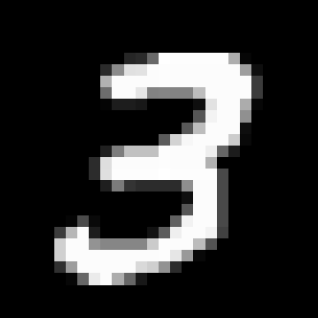

In [78]:
cv2_imshow(input_image)

In [79]:
input_image.shape

(318, 318, 3)

In [80]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [81]:
grayscale.shape

(318, 318)

In [82]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [83]:
input_image_resize.shape

(28, 28)

In [84]:
cv2_imshow(input_image_resize)

In [85]:
input_image_resize = input_image_resize/255

In [86]:
type(input_image_resize)

numpy.ndarray

In [87]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [88]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[1.4524188e-06 8.2043451e-01 1.5484917e-01 1.0000000e+00 1.2382356e-12
  3.5063484e-01 1.7293608e-16 1.6734108e-01 4.6362969e-01 2.6925623e-01]]


In [89]:
input_pred_label = np.argmax(input_prediction)

In [90]:
print(input_pred_label)

3


Path of the image to be predicted: /content/predict.png


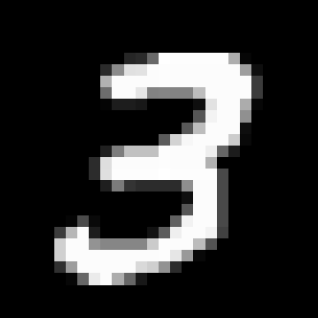

1/1 [==============================] - 0s 37ms/step
The Handwritten Digit is recognised as  3


In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)